# Introduction 

This notebook is about CNN implemented by PyTorch. The used dataset is MNIST.



In [0]:
import os 
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

In [0]:
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001         # learning rate
DOWNLOAD_MNIST = False

if not(os.path.exists('./mnist/')) or not os.listdir('./mnist/'):
  DOWNLOAD_MNIST = True

train_data = torchvision.datasets.MNIST(
    root = './mnist/',
    train = True,
    transform = torchvision.transforms.ToTensor(),

    download = DOWNLOAD_MNIST,
)

torch.Size([60000, 28, 28])
torch.Size([60000])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


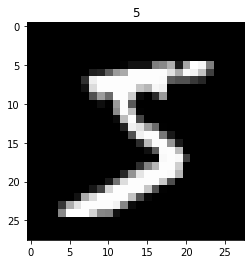

In [27]:
print(train_data.train_data.size())
print(train_data.train_labels.size())
plt.imshow(train_data.train_data[0].numpy(),cmap='gray')
plt.title('%i' % train_data.train_labels[0])
plt.show()

In [28]:
train_loader = Data.DataLoader(dataset = train_data, batch_size=BATCH_SIZE, shuffle = True)

test_data = torchvision.datasets.MNIST(root = './mnist',train = False)
test_x = torch.unsqueeze(test_data.test_data, dim = 1).type(torch.FloatTensor)[:2000]/255.
test_y = test_data.test_labels[:2000]

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [29]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Sequential(  #input shape(1,28,28)
        nn.Conv2d(
            in_channels = 1,     #input height
            out_channels = 16,   #n_filters
            kernel_size = 5,    #filter size
            stride = 1,
            padding = 2,    #padding = (kernel_size-1)/2 if stride =1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2), #choose max value in 2x2 area, output shape(16,14,14)
    )
    self.conv2 = nn.Sequential(
        nn.Conv2d(16, 32, 5, 1, 2),
        nn.ReLU(),
        nn.MaxPool2d(2),
    )
    self.out = nn.Linear(32 * 7 * 7, 10) #fully connected layer, output 10 classes

  def forward(self, x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = x.view(x.size(0), -1)   #flatten the output of conv2 to (batch_size, 32 * 7 * 7)
    output = self.out(x)
    return output, x # return x for visualization

cnn = CNN()
print(cnn) #net architecture 

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [0]:
optimizer = torch.optim.Adam(cnn.parameters(), lr = LR) #optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()

In [23]:
pip install sklearn

In [1]:
from matplotlib import cm
try: from sklearn.maniford import TSNE; HAS_SK = True
except: HAS_SK = False;
print('Please install sklearn for layer visualization')
def plot_with_labels(lowDWeights, labels):
  plt.cla()
  X, Y =lowDweights[:,0], lowDWeights[:,1]
  for x, y, s in zip(X, Y, labels):
    c = cm.rainbow(int(225 * s / 9)); plt.text(x,y,s, backgroundcolor = c, fontsize = 9)
  plt.xlim(X.min(), X.max());
  plt.ylim(Y.min(), Y.max());
  plt.title('Visualize last layer');

Please install sklearn for layer visualization


In [34]:
plt.ion()

#training and testing
for epoch in range(EPOCH):
  for step, (b_x, b_y) in enumerate(train_loader):

    output = cnn(b_x)[0]
    loss = loss_func(output, b_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 50 == 0 :
      test_output, last_layer = cnn(test_x)
      pred_y = torch.max(test_output,1)[1].data.numpy()
      accuracy = float((pred_y == test_y.data.numpy()).astype(int).sum()) / float(test_y.size(0))
      print('Epoch:', epoch, '| train loss: %.4f' % loss.data.numpy(), '|test accuracy: %.2f' % accuracy)
      if HAS_SK:
        #visulization of trained flatten layer(T-SNE)
        tsne = TSNE(perplexity=30, n_components =2, init = 'pca', n_iter=5000)
        plot_only = 500
        low_dim_embs = tsne.fit_transform(last_layer.data.numpy()[:plot_only, :])
        labels = test_y.numpy()[:plot_only]
        plot_with_labels(low_dim_embs, labels)

plt.ioff()

Epoch: 0 | train loss: 0.1344 |test accuracy: 0.97
Epoch: 0 | train loss: 0.0405 |test accuracy: 0.97
Epoch: 0 | train loss: 0.0160 |test accuracy: 0.97
Epoch: 0 | train loss: 0.0291 |test accuracy: 0.98
Epoch: 0 | train loss: 0.0751 |test accuracy: 0.97
Epoch: 0 | train loss: 0.0374 |test accuracy: 0.98
Epoch: 0 | train loss: 0.0465 |test accuracy: 0.98
Epoch: 0 | train loss: 0.0118 |test accuracy: 0.98
Epoch: 0 | train loss: 0.0091 |test accuracy: 0.98
Epoch: 0 | train loss: 0.0413 |test accuracy: 0.98
Epoch: 0 | train loss: 0.1516 |test accuracy: 0.98
Epoch: 0 | train loss: 0.0290 |test accuracy: 0.98
Epoch: 0 | train loss: 0.1612 |test accuracy: 0.98
Epoch: 0 | train loss: 0.2178 |test accuracy: 0.98
Epoch: 0 | train loss: 0.0098 |test accuracy: 0.98
Epoch: 0 | train loss: 0.0539 |test accuracy: 0.98
Epoch: 0 | train loss: 0.0370 |test accuracy: 0.98
Epoch: 0 | train loss: 0.0098 |test accuracy: 0.98
Epoch: 0 | train loss: 0.0223 |test accuracy: 0.98
Epoch: 0 | train loss: 0.4047 |

In [35]:
# print 10 predictions from test data
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y,'prediction number')
print(test_y[:10].numpy(),'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
